In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veriyi yükleme
veri = pd.read_csv('veri.csv')

# İlk birkaç satırı görüntüleme
veri.head()


,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [2]:
# Sütun isimlerini Türkçeye çevirme
veri.columns = [
    'tarih_saat', 'kosullar', 'cig_noktasi', 'sis', 'dolu', 'hissedilen_sicaklik', 'nem',
    'yagis', 'basinc', 'yagmur', 'kar', 'sicaklik', 'yildirim', 'hortum', 'gorus_mesafesi',
    'ruzgar_yonu_derece', 'ruzgar_yonu', 'ruzgar_gust', 'ruzgar_soguklugu', 'ruzgar_hizi'
]

# İlk birkaç satırı tekrar görüntüleme
veri.head()


,tarih_saat,kosullar,cig_noktasi,sis,dolu,hissedilen_sicaklik,nem,yagis,basinc,yagmur,kar,sicaklik,yildirim,hortum,gorus_mesafesi,ruzgar_yonu_derece,ruzgar_yonu,ruzgar_gust,ruzgar_soguklugu,ruzgar_hizi
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [3]:
# Eksik verilerin kontrolü
veri.isnull().sum()

# Eksik verileri temizleme
# İhtiyaç duyulmayan sütunları düşürelim
veri = veri.drop(columns=['hissedilen_sicaklik', 'yagis', 'yagmur', 'kar', 'yildirim', 'hortum', 'ruzgar_soguklugu'])

# Basınç ve nem değerlerinde eksik olan satırları çıkaralım
veri = veri[(veri['basinc'] != -9999) & (veri['nem'].notna())]

# Temizlenmiş veriyi tekrar görüntüleme
veri.head()


,tarih_saat,kosullar,cig_noktasi,sis,dolu,nem,basinc,sicaklik,gorus_mesafesi,ruzgar_yonu_derece,ruzgar_yonu,ruzgar_gust,ruzgar_hizi
0,19961101-11:00,Smoke,9.0,0,0,27.0,1010.0,30.0,5.0,280.0,West,NaN,7.4
3,19961101-14:00,Smoke,10.0,0,0,41.0,1010.0,24.0,2.0,0.0,North,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,47.0,1011.0,23.0,1.2,0.0,North,NaN,0.0
5,19961101-17:00,Smoke,12.0,0,0,56.0,1011.0,21.0,NaN,0.0,North,NaN,NaN
6,19961101-18:00,Smoke,13.0,0,0,60.0,1010.0,21.0,0.8,0.0,North,NaN,0.0


In [4]:
# Temel istatistikleri görüntüleme
veri.describe()


,cig_noktasi,sis,dolu,nem,basinc,sicaklik,gorus_mesafesi,ruzgar_yonu_derece,ruzgar_gust,ruzgar_hizi
count,99668.000000,99671.000000,99671.00000,99671.000000,9.944100e+04,99671.000000,95436.000000,84943.000000,1053.000000,97444.000000
mean,15.744612,0.069278,0.00013,57.885443,2.027664e+03,25.460595,2.404223,164.123188,37.640836,7.574303
std,7.052559,0.253927,0.01142,23.800781,3.204783e+05,8.479361,20.866905,119.870264,6.862362,10.675327
min,-24.000000,0.000000,0.00000,4.000000,0.000000e+00,1.000000,0.000000,0.000000,25.900000,0.000000
25%,10.000000,0.000000,0.00000,39.000000,1.002000e+03,19.000000,1.500000,50.000000,33.300000,0.000000
50%,15.000000,0.000000,0.00000,58.000000,1.008000e+03,27.000000,2.000000,160.000000,37.000000,7.400000
75%,22.000000,0.000000,0.00000,78.000000,1.014000e+03,32.000000,3.000000,270.000000,40.700000,11.100000
max,35.000000,1.000000,1.00000,243.000000,1.010614e+08,90.000000,6436.000000,960.000000,92.600000,1514.900000


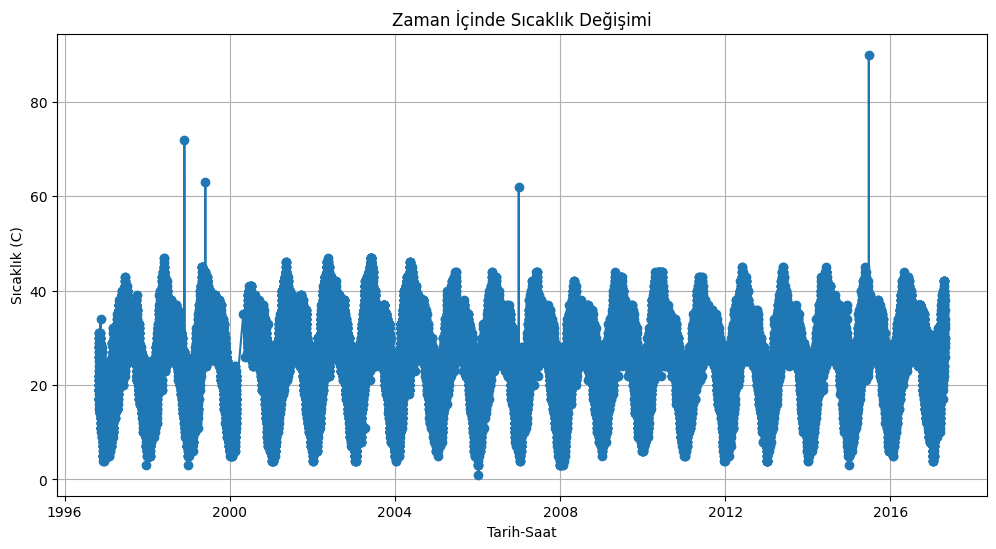

In [5]:
# Tarih-saat sütununu datetime formatına çevirme
veri['tarih_saat'] = pd.to_datetime(veri['tarih_saat'])

# Sıcaklık zaman serisi grafiği
plt.figure(figsize=(12, 6))
plt.plot(veri['tarih_saat'], veri['sicaklik'], marker='o')
plt.title('Zaman İçinde Sıcaklık Değişimi')
plt.xlabel('Tarih-Saat')
plt.ylabel('Sıcaklık (C)')
plt.grid(True)
plt.show()


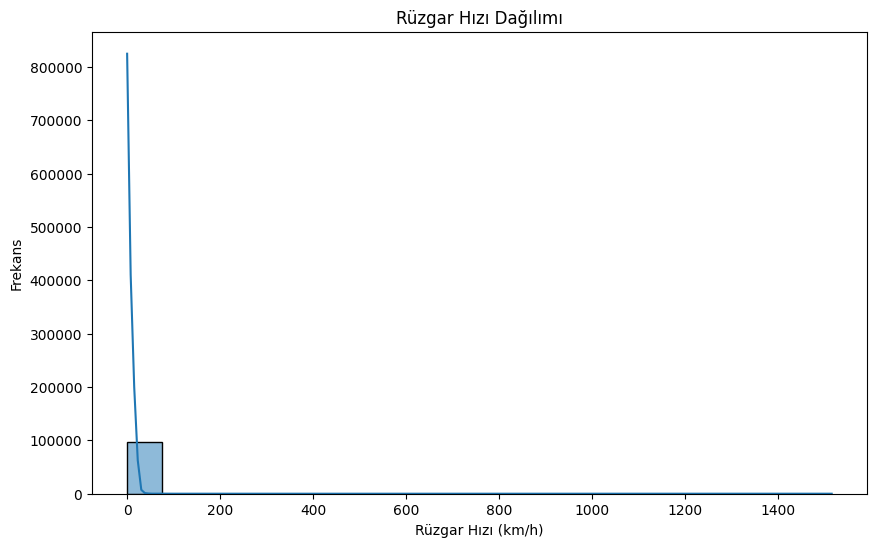

In [6]:
# Rüzgar hızı dağılımı
plt.figure(figsize=(10, 6))
sns.histplot(veri['ruzgar_hizi'], bins=20, kde=True)
plt.title('Rüzgar Hızı Dağılımı')
plt.xlabel('Rüzgar Hızı (km/h)')
plt.ylabel('Frekans')
plt.show()


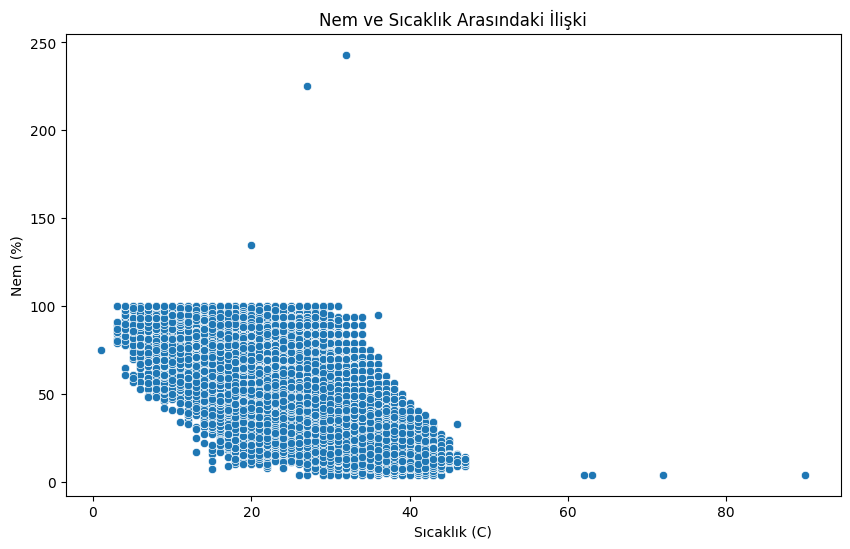

In [7]:
# Nem ve sıcaklık arasındaki ilişki
plt.figure(figsize=(10, 6))
sns.scatterplot(x=veri['sicaklik'], y=veri['nem'])
plt.title('Nem ve Sıcaklık Arasındaki İlişki')
plt.xlabel('Sıcaklık (C)')
plt.ylabel('Nem (%)')
plt.show()


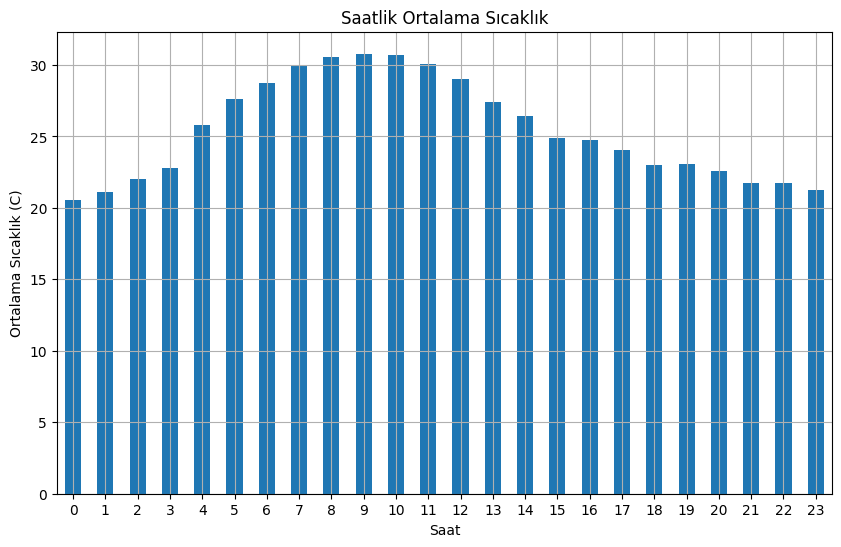

In [8]:
# Saat sütununu oluşturma
veri['saat'] = veri['tarih_saat'].dt.hour

# Saatlik ortalama sıcaklık
saatlik_ortalama_sicaklik = veri.groupby('saat')['sicaklik'].mean()

# Görselleştirme
plt.figure(figsize=(10, 6))
saatlik_ortalama_sicaklik.plot(kind='bar')
plt.title('Saatlik Ortalama Sıcaklık')
plt.xlabel('Saat')
plt.ylabel('Ortalama Sıcaklık (C)')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


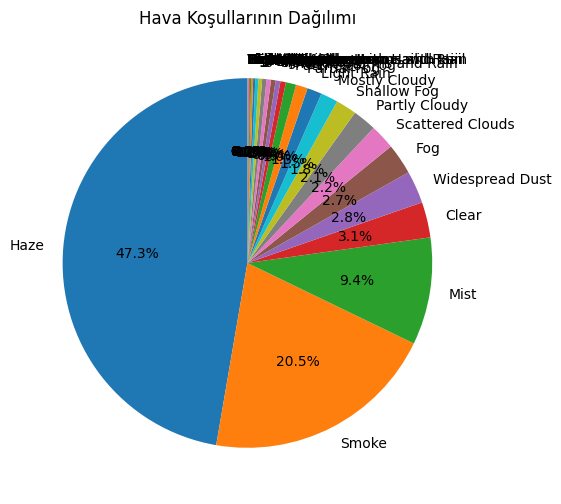

In [9]:
# Hava koşullarının dağılımı
kosullar_sayim = veri['kosullar'].value_counts()

# Görselleştirme
plt.figure(figsize=(10, 6))
kosullar_sayim.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Hava Koşullarının Dağılımı')
plt.ylabel('')
plt.show()


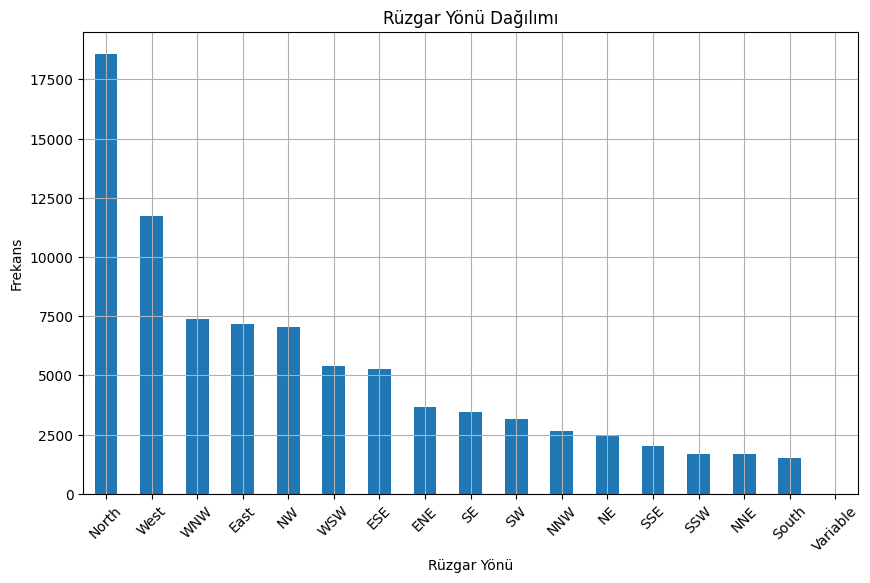

In [10]:
# Rüzgar yönü dağılımı
ruzgar_yonu_sayim = veri['ruzgar_yonu'].value_counts()

# Görselleştirme
plt.figure(figsize=(10, 6))
ruzgar_yonu_sayim.plot(kind='bar')
plt.title('Rüzgar Yönü Dağılımı')
plt.xlabel('Rüzgar Yönü')
plt.ylabel('Frekans')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


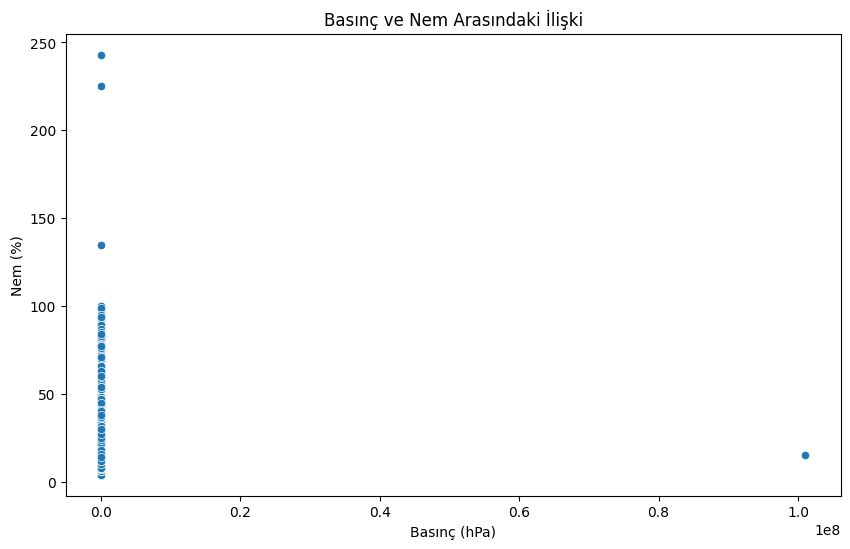

In [11]:
# Basınç ve nem arasındaki ilişki
plt.figure(figsize=(10, 6))
sns.scatterplot(x=veri['basinc'], y=veri['nem'])
plt.title('Basınç ve Nem Arasındaki İlişki')
plt.xlabel('Basınç (hPa)')
plt.ylabel('Nem (%)')
plt.show()


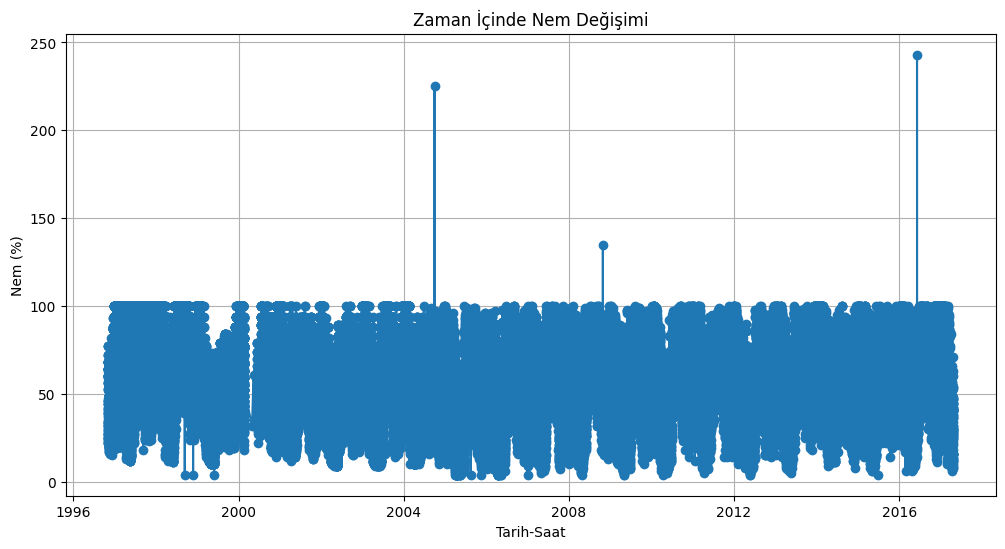

In [12]:
# Zaman içinde nem değişimi
plt.figure(figsize=(12, 6))
plt.plot(veri['tarih_saat'], veri['nem'], marker='o', linestyle='-')
plt.title('Zaman İçinde Nem Değişimi')
plt.xlabel('Tarih-Saat')
plt.ylabel('Nem (%)')
plt.grid(True)
plt.show()


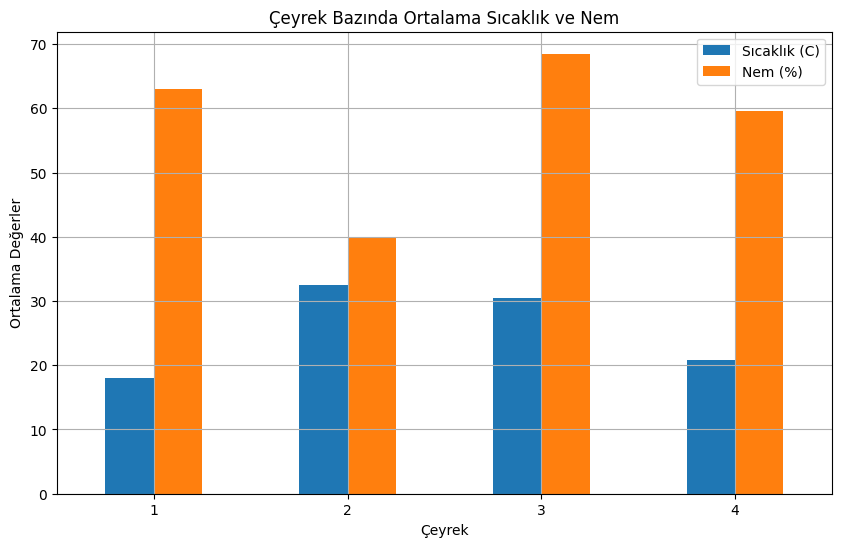

In [13]:
# Çeyrek sütunu oluşturma
veri['ceyrek'] = veri['tarih_saat'].dt.quarter

# Çeyrek bazında ortalama sıcaklık ve nem
ceyrek_ortalama = veri.groupby('ceyrek')[['sicaklik', 'nem']].mean()

# Görselleştirme
ceyrek_ortalama.plot(kind='bar', figsize=(10, 6))
plt.title('Çeyrek Bazında Ortalama Sıcaklık ve Nem')
plt.xlabel('Çeyrek')
plt.ylabel('Ortalama Değerler')
plt.xticks(rotation=0)
plt.grid(True)
plt.legend(['Sıcaklık (C)', 'Nem (%)'])
plt.show()


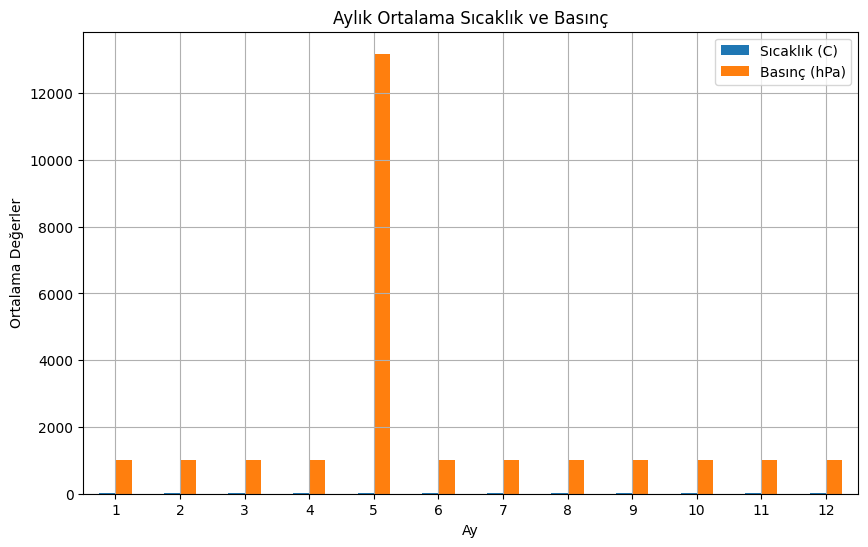

In [14]:
# Ay sütunu oluşturma
veri['ay'] = veri['tarih_saat'].dt.month

# Aylık ortalama sıcaklık ve basınç
aylik_ortalama = veri.groupby('ay')[['sicaklik', 'basinc']].mean()

# Görselleştirme
aylik_ortalama.plot(kind='bar', figsize=(10, 6))
plt.title('Aylık Ortalama Sıcaklık ve Basınç')
plt.xlabel('Ay')
plt.ylabel('Ortalama Değerler')
plt.xticks(rotation=0)
plt.grid(True)
plt.legend(['Sıcaklık (C)', 'Basınç (hPa)'])
plt.show()


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [20]:
# Sadece sayısal sütunları seçme
numeric_columns = veri.select_dtypes(include=['float64', 'int64']).columns

# Eksik değerleri ortalama ile doldurma
veri[numeric_columns] = veri[numeric_columns].fillna(veri[numeric_columns].mean())

# Kullanılacak özellikler ve hedef değişken
features = ['cig_noktasi', 'nem', 'basinc', 'ruzgar_hizi']
target = 'sicaklik'

# Özellikler ve hedef değişkeni ayırma
X = veri[features]
y = veri[target]

# Veriyi eğitim ve test olarak ayırma (%70 eğitim, %30 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Linear Regression:
Eğitim RMSE: 2.4818311431351288
Test RMSE: 8.972499903589144
Eğitim R2: 0.9146387789008977
Test R2: -0.12920384785353511
accuracy:  -0.12920384785353511

Random Forest:
Eğitim RMSE: 0.6020442241027898
Test RMSE: 1.2530706757328791
Eğitim R2: 0.9949768870072515
Test R2: 0.9779759817506669
accuracy:  0.9779759817506669

Decision Tree:
Eğitim RMSE: 0.4458147283855514
Test RMSE: 1.5656064661013926
Eğitim R2: 0.9972456128508741
Test R2: 0.9656196227865407
accuracy:  0.9656196227865407

Gradient Boosting:
Eğitim RMSE: 1.4924229818968384
Test RMSE: 1.4943629237343183
Eğitim R2: 0.9691326024487903
Test R2: 0.9686774152932274
accuracy:  0.9686774152932274


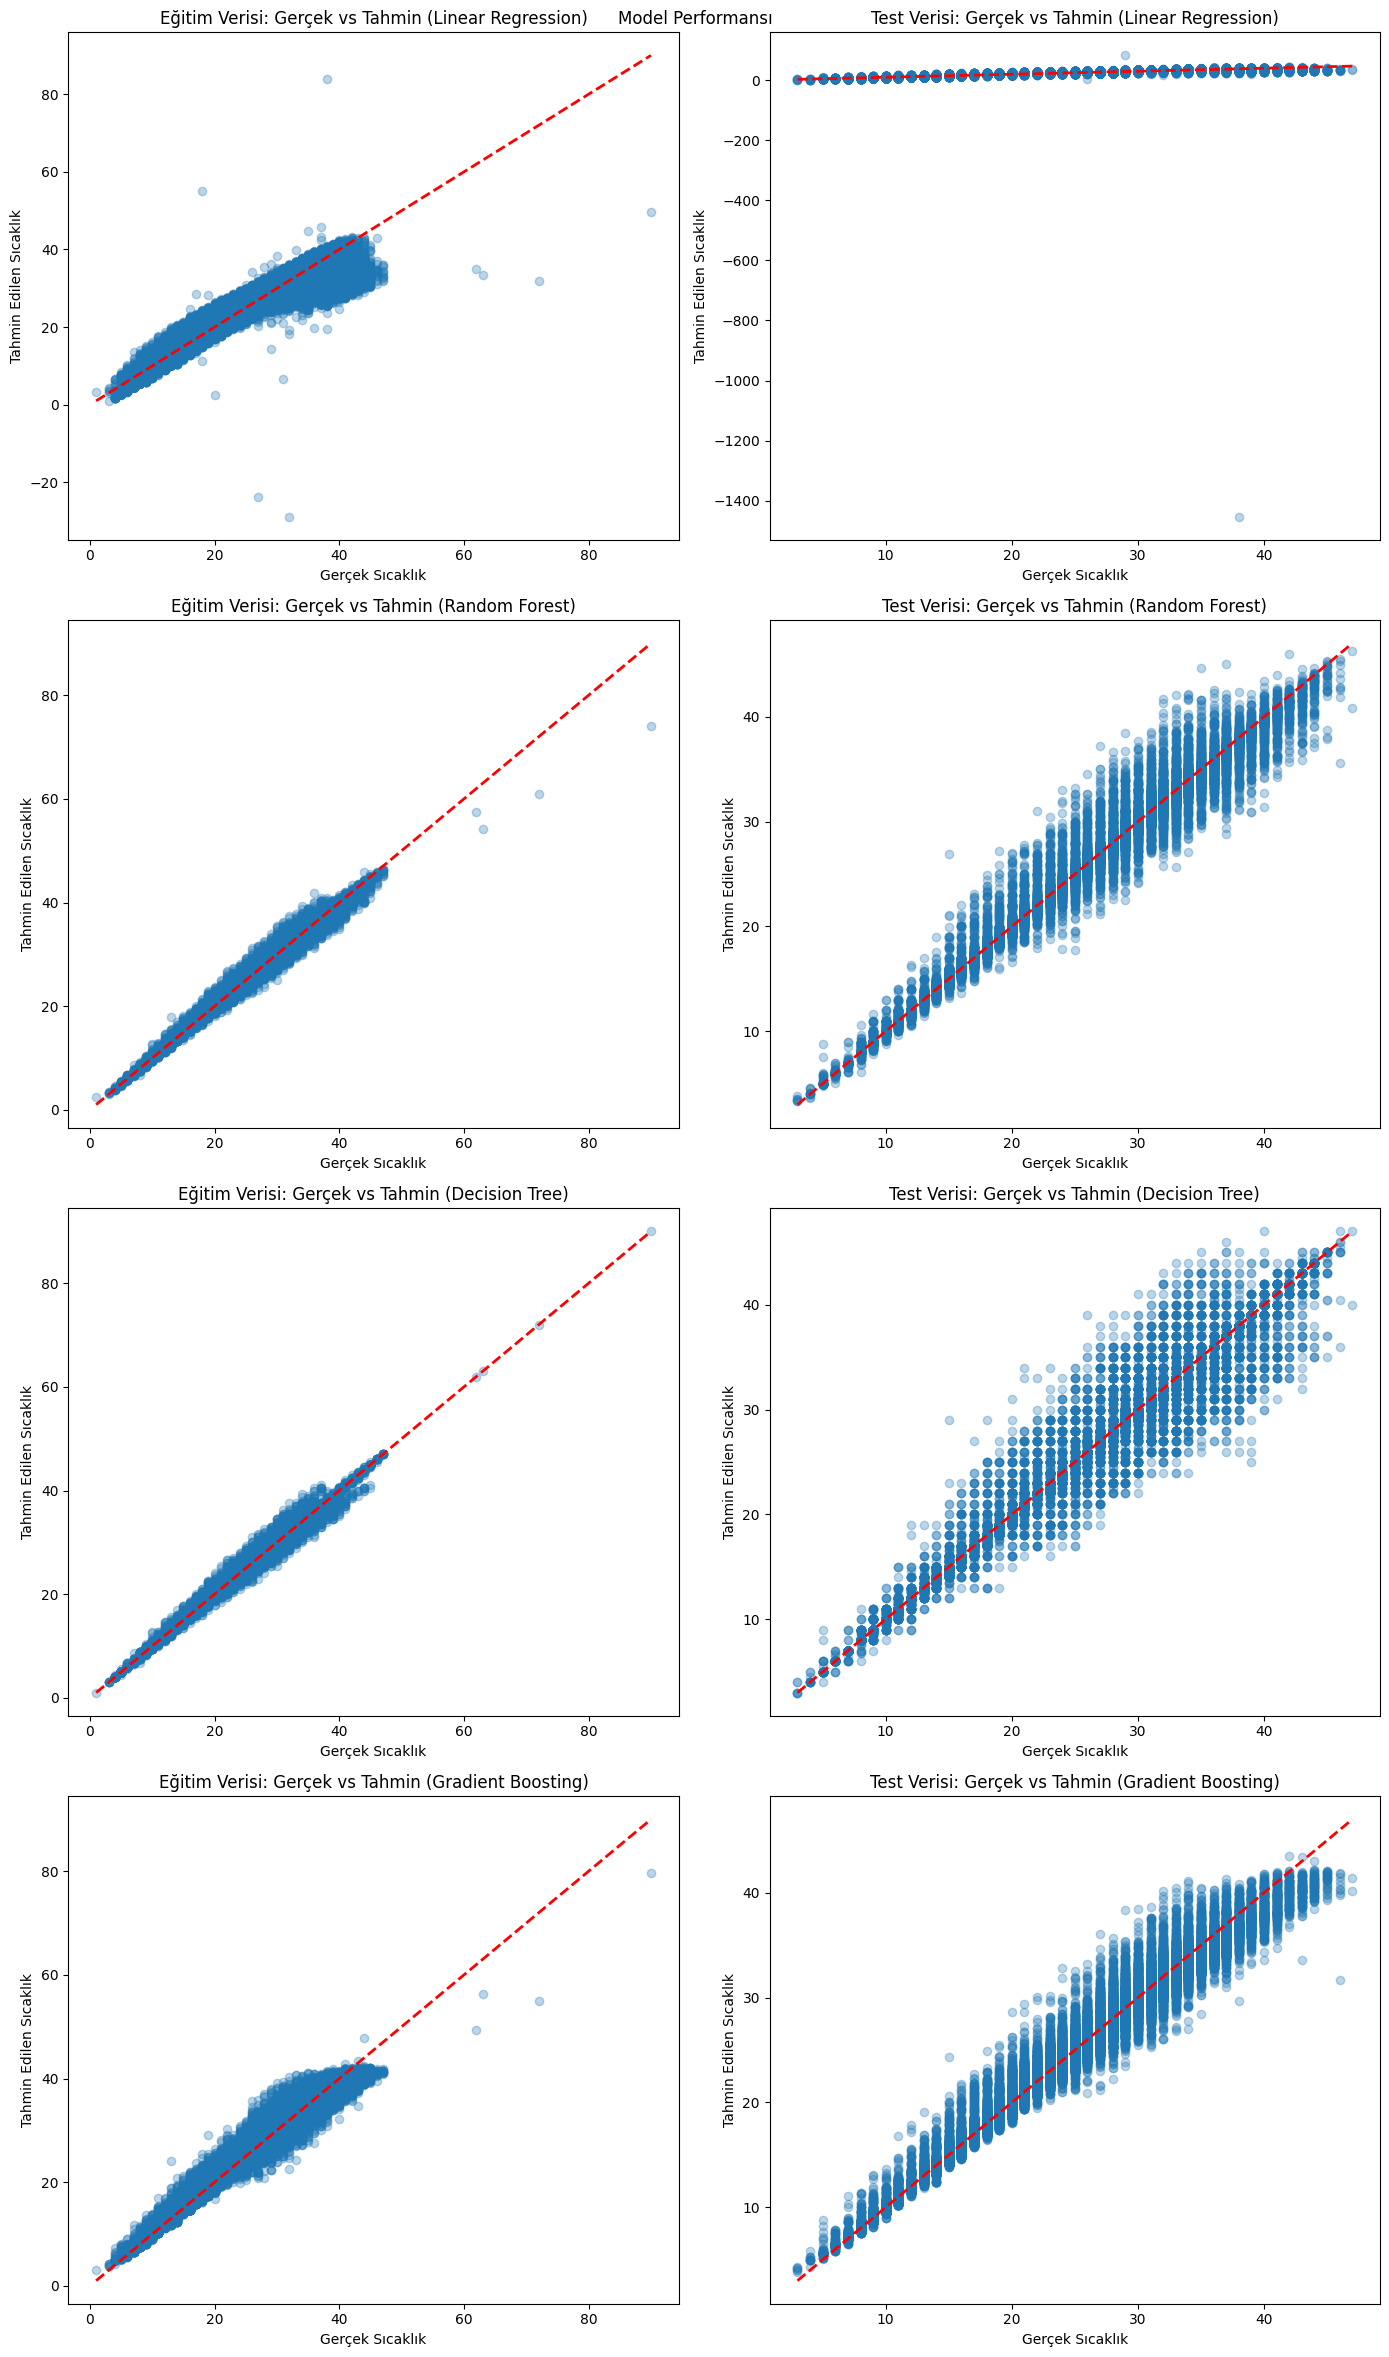

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Veriyi yükleme
veri = pd.read_csv('veri.csv')

# Sütun isimlerini Türkçeye çevirme
veri.columns = [
    'tarih_saat', 'kosullar', 'cig_noktasi', 'sis', 'dolu', 'hissedilen_sicaklik', 'nem',
    'yagis', 'basinc', 'yagmur', 'kar', 'sicaklik', 'yildirim', 'hortum', 'gorus_mesafesi',
    'ruzgar_yonu_derece', 'ruzgar_yonu', 'ruzgar_gust', 'ruzgar_soguklugu', 'ruzgar_hizi'
]

# Eksik verileri temizleme
veri = veri.drop(columns=['hissedilen_sicaklik', 'yagis', 'yagmur', 'kar', 'yildirim', 'hortum', 'ruzgar_soguklugu'])
veri = veri[(veri['basinc'] != -9999) & (veri['nem'].notna())]

# Sayısal sütunları seçme
numeric_columns = veri.select_dtypes(include=['float64', 'int64']).columns

# Eksik değerleri ortalama ile doldurma
veri[numeric_columns] = veri[numeric_columns].fillna(veri[numeric_columns].mean())

# Kullanılacak özellikler ve hedef değişken
features = ['cig_noktasi', 'nem', 'basinc', 'ruzgar_hizi']
target = 'sicaklik'

# Özellikler ve hedef değişkeni ayırma
X = veri[features]
y = veri[target]

# Veriyi eğitim ve test olarak ayırma (%70 eğitim, %30 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression Modeli
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Random Forest Modeli
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Decision Tree Modeli
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Gradient Boosting Modeli
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Linear Regression tahmin yapma
y_train_pred_lr = lr_model.predict(X_train_scaled)
y_test_pred_lr = lr_model.predict(X_test_scaled)

# Random Forest tahmin yapma
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Decision Tree tahmin yapma
y_train_pred_dt = dt_model.predict(X_train)
y_test_pred_dt = dt_model.predict(X_test)

# Gradient Boosting tahmin yapma
y_train_pred_gb = gb_model.predict(X_train)
y_test_pred_gb = gb_model.predict(X_test)

# Modeli değerlendirme (Linear Regression)
train_rmse_lr = mean_squared_error(y_train, y_train_pred_lr, squared=False)
test_rmse_lr = mean_squared_error(y_test, y_test_pred_lr, squared=False)
train_r2_lr = r2_score(y_train, y_train_pred_lr)
test_r2_lr = r2_score(y_test, y_test_pred_lr)

# Modeli değerlendirme (Random Forest)
train_rmse_rf = mean_squared_error(y_train, y_train_pred_rf, squared=False)
test_rmse_rf = mean_squared_error(y_test, y_test_pred_rf, squared=False)
train_r2_rf = r2_score(y_train, y_train_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)

# Modeli değerlendirme (Decision Tree)
train_rmse_dt = mean_squared_error(y_train, y_train_pred_dt, squared=False)
test_rmse_dt = mean_squared_error(y_test, y_test_pred_dt, squared=False)
train_r2_dt = r2_score(y_train, y_train_pred_dt)
test_r2_dt = r2_score(y_test, y_test_pred_dt)

# Modeli değerlendirme (Gradient Boosting)
train_rmse_gb = mean_squared_error(y_train, y_train_pred_gb, squared=False)
test_rmse_gb = mean_squared_error(y_test, y_test_pred_gb, squared=False)
train_r2_gb = r2_score(y_train, y_train_pred_gb)
test_r2_gb = r2_score(y_test, y_test_pred_gb)

print("Linear Regression:")
print(f'Eğitim RMSE: {train_rmse_lr}')
print(f'Test RMSE: {test_rmse_lr}')
print(f'Eğitim R2: {train_r2_lr}')
print(f'Test R2: {test_r2_lr}')
print ("accuracy: ", lr_model.score(X_test_scaled, y_test))

print("\nRandom Forest:")
print(f'Eğitim RMSE: {train_rmse_rf}')
print(f'Test RMSE: {test_rmse_rf}')
print(f'Eğitim R2: {train_r2_rf}')
print(f'Test R2: {test_r2_rf}')
print ("accuracy: ", rf_model.score(X_test, y_test))

print("\nDecision Tree:")
print(f'Eğitim RMSE: {train_rmse_dt}')
print(f'Test RMSE: {test_rmse_dt}')
print(f'Eğitim R2: {train_r2_dt}')
print(f'Test R2: {test_r2_dt}')
print ("accuracy: ", dt_model.score(X_test, y_test))

print("\nGradient Boosting:")
print(f'Eğitim RMSE: {train_rmse_gb}')
print(f'Test RMSE: {test_rmse_gb}')
print(f'Eğitim R2: {train_r2_gb}')
print(f'Test R2: {test_r2_gb}')
print ("accuracy: ", gb_model.score(X_test, y_test))

# Görselleştirme
plt.figure(figsize=(14, 24))

# Linear Regression: Eğitim verisi ve tahminleri
plt.subplot(4, 2, 1)
plt.scatter(y_train, y_train_pred_lr, alpha=0.3)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Gerçek Sıcaklık')
plt.ylabel('Tahmin Edilen Sıcaklık')
plt.title('Eğitim Verisi: Gerçek vs Tahmin (Linear Regression)')

# Linear Regression: Test verisi ve tahminleri
plt.subplot(4, 2, 2)
plt.scatter(y_test, y_test_pred_lr, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Gerçek Sıcaklık')
plt.ylabel('Tahmin Edilen Sıcaklık')
plt.title('Test Verisi: Gerçek vs Tahmin (Linear Regression)')

# Random Forest: Eğitim verisi ve tahminleri
plt.subplot(4, 2, 3)
plt.scatter(y_train, y_train_pred_rf, alpha=0.3)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Gerçek Sıcaklık')
plt.ylabel('Tahmin Edilen Sıcaklık')
plt.title('Eğitim Verisi: Gerçek vs Tahmin (Random Forest)')

# Random Forest: Test verisi ve tahminleri
plt.subplot(4, 2, 4)
plt.scatter(y_test, y_test_pred_rf, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Gerçek Sıcaklık')
plt.ylabel('Tahmin Edilen Sıcaklık')
plt.title('Test Verisi: Gerçek vs Tahmin (Random Forest)')

# Decision Tree: Eğitim verisi ve tahminleri
plt.subplot(4, 2, 5)
plt.scatter(y_train, y_train_pred_dt, alpha=0.3)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Gerçek Sıcaklık')
plt.ylabel('Tahmin Edilen Sıcaklık')
plt.title('Eğitim Verisi: Gerçek vs Tahmin (Decision Tree)')

# Decision Tree: Test verisi ve tahminleri
plt.subplot(4, 2, 6)
plt.scatter(y_test, y_test_pred_dt, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Gerçek Sıcaklık')
plt.ylabel('Tahmin Edilen Sıcaklık')
plt.title('Test Verisi: Gerçek vs Tahmin (Decision Tree)')

# Gradient Boosting: Eğitim verisi ve tahminleri
plt.subplot(4, 2, 7)
plt.scatter(y_train, y_train_pred_gb, alpha=0.3)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Gerçek Sıcaklık')
plt.ylabel('Tahmin Edilen Sıcaklık')
plt.title('Eğitim Verisi: Gerçek vs Tahmin (Gradient Boosting)')

# Gradient Boosting: Test verisi ve tahminleri
plt.subplot(4, 2, 8)
plt.scatter(y_test, y_test_pred_gb, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Gerçek Sıcaklık')
plt.ylabel('Tahmin Edilen Sıcaklık')
plt.title('Test Verisi: Gerçek vs Tahmin (Gradient Boosting)')

plt.suptitle('Model Performansı')
plt.tight_layout()
plt.show()



XGBoost:
Eğitim RMSE: 1.1796573336597
Test RMSE: 1.2668019498674203
Eğitim R2: 0.9807146332162019
Test R2: 0.9774906543058844
accuracy:  0.9774906543058844


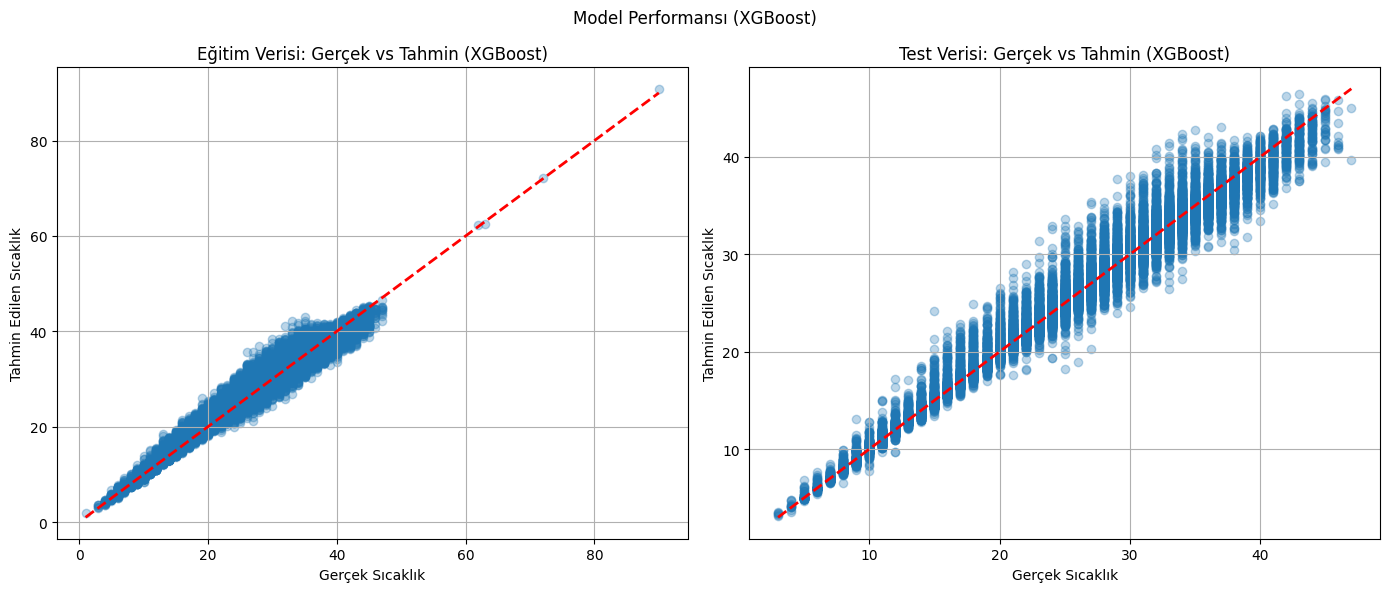

In [31]:
from xgboost import XGBRegressor

# XGBoost Modeli
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# XGBoost tahmin yapma
y_train_pred_xgb = xgb_model.predict(X_train)
y_test_pred_xgb = xgb_model.predict(X_test)

# Modeli değerlendirme (XGBoost)
train_rmse_xgb = mean_squared_error(y_train, y_train_pred_xgb, squared=False)
test_rmse_xgb = mean_squared_error(y_test, y_test_pred_xgb, squared=False)
train_r2_xgb = r2_score(y_train, y_train_pred_xgb)
test_r2_xgb = r2_score(y_test, y_test_pred_xgb)

print("\nXGBoost:")
print(f'Eğitim RMSE: {train_rmse_xgb}')
print(f'Test RMSE: {test_rmse_xgb}')
print(f'Eğitim R2: {train_r2_xgb}')
print(f'Test R2: {test_r2_xgb}')
print ("accuracy: ", xgb_model.score(X_test, y_test))

# Görselleştirme
plt.figure(figsize=(14, 6))

# XGBoost: Eğitim verisi ve tahminleri
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred_xgb, alpha=0.3)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Gerçek Sıcaklık')
plt.ylabel('Tahmin Edilen Sıcaklık')
plt.title('Eğitim Verisi: Gerçek vs Tahmin (XGBoost)')
plt.grid(True)

# XGBoost: Test verisi ve tahminleri
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_xgb, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Gerçek Sıcaklık')
plt.ylabel('Tahmin Edilen Sıcaklık')
plt.title('Test Verisi: Gerçek vs Tahmin (XGBoost)')
plt.grid(True)

plt.suptitle('Model Performansı (XGBoost)')
plt.tight_layout()

plt.show()




